<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 15: Scikit-Learn
### Notebook 9: Utilities

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import seaborn as sns ; sns.set()

In [2]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

Using TensorFlow backend.


In [3]:
clr_list = ['#00CEAB', '#FFE53F', '#F26363']

In [4]:
def show_data_and_splits(samples_train, samples_test, labels_train, labels_test, filename):
    plt.figure(figsize=(10,3))
    plt.subplot(1, 3, 1)
    clrs = [clr_list[v] for v in circle_labels]
    plt.scatter(circle_xy[:,0], circle_xy[:,1], c=clrs, s=25)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.xlim(-1.4, 1.4)
    plt.ylim(-1.4, 1.4)
    plt.title('Starting data')

    plt.subplot(1, 3, 2)
    clrs = [clr_list[v] for v in circle_labels]
    plt.scatter(samples_train[:,0], samples_train[:,1], c=clrs, s=25)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.xlim(-1.4, 1.4)
    plt.ylim(-1.4, 1.4)
    plt.title('Training set')

    plt.subplot(1, 3, 3)
    clrs = [clr_list[v] for v in circle_labels]
    plt.scatter(samples_test[:,0], samples_test[:,1], c=clrs, s=25)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.xlim(-1.4, 1.4)
    plt.ylim(-1.4, 1.4)
    plt.title('Test set')

    file_helper.save_figure(filename)
    plt.show()

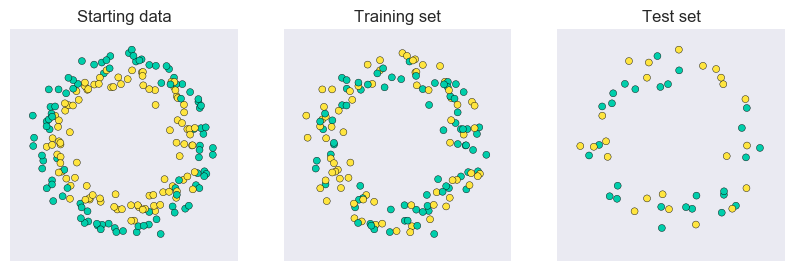

In [5]:
# Show the train and test splits using randomized shuffling
np.random.seed(42)

(circle_xy, circle_labels) = make_circles(n_samples=200, noise=.08)
samples_train, samples_test, labels_train, labels_test = \
    train_test_split(circle_xy, circle_labels, test_size=0.25)
    
show_data_and_splits(samples_train, samples_test, labels_train, labels_test, 'train-test-splits')

In [6]:
# make our own circle data by working clockwise from 3pm
def make_clockwise_circle_data(n_samples=200, noise=0.12):
    steps = int(n_samples/2) # only half the steps, because we make data in pairs
    np.random.seed(42)
    circle_xy = []
    circle_labels = []
    radii = [1, 0.7]
    for i in range(steps):
        angle = -2*math.pi*i / steps
        for circle_num in [0,1]:
            r = radii[circle_num]
            xy = [r*math.cos(angle), r*math.sin(angle)]
            xy = [xy[0]+np.random.uniform(-noise, noise), xy[1]+np.random.uniform(-noise,noise)]
            circle_xy.append(xy)
            circle_labels.append(circle_num)
    return (np.array(circle_xy), circle_labels)

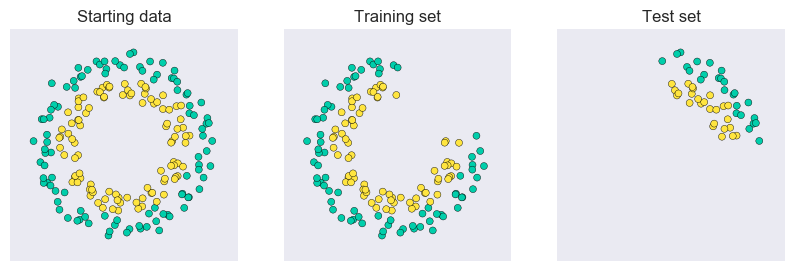

In [7]:
# Show the train and test splits without randomized shuffling.

np.random.seed(42)
plt.figure(figsize=(10,3))

circle_xy, circle_labels = make_clockwise_circle_data()
sample_size = int(0.75 * len(circle_xy))
samples_train = circle_xy[:sample_size]
labels_train = circle_labels[:sample_size]
samples_test = circle_xy[sample_size:]
labels_test = circle_xy[sample_size:]

show_data_and_splits(samples_train, samples_test, labels_train, labels_test, 'bad-train-test-splits')